In [1]:
# Load CSV file from my google drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


path = '/content/drive/MyDrive/Colab Notebooks/medical_examination.csv'
df = pd.read_csv(path)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Add 'overweight' column
df["overweight"] = np.where( ( df["weight"] / (df["height"]/100)**2 )>25, 1, 0)

df["overweight"]

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [6]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df["cholesterol"] = [0 if x==1 else 1 for x in df["cholesterol"] ]
print(df["cholesterol"])

df["gluc"] = [0 if x==1 else 1 for x in df["gluc"] ]
print(df["gluc"])

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int64


In [7]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"] )

print(df_cat)

        cardio     variable  value
0            0  cholesterol      0
1            1  cholesterol      1
2            1  cholesterol      1
3            1  cholesterol      0
4            0  cholesterol      0
...        ...          ...    ...
419995       0   overweight      1
419996       1   overweight      1
419997       1   overweight      1
419998       1   overweight      1
419999       0   overweight      0

[420000 rows x 3 columns]


In [8]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
# You will have to rename one of the collumns for the catplot to work correctly.
df_cat = pd.DataFrame( df_cat.groupby( ['cardio', 'variable', 'value'] )['value'].count() ).rename(columns={'value' : 'total'}).reset_index()

print(df_cat)

    cardio     variable  value  total
0        0       active      0   6378
1        0       active      1  28643
2        0         alco      0  33080
3        0         alco      1   1941
4        0  cholesterol      0  29330
5        0  cholesterol      1   5691
6        0         gluc      0  30894
7        0         gluc      1   4127
8        0   overweight      0  15915
9        0   overweight      1  19106
10       0        smoke      0  31781
11       0        smoke      1   3240
12       1       active      0   7361
13       1       active      1  27618
14       1         alco      0  33156
15       1         alco      1   1823
16       1  cholesterol      0  23055
17       1  cholesterol      1  11924
18       1         gluc      0  28585
19       1         gluc      1   6394
20       1   overweight      0  10539
21       1   overweight      1  24440
22       1        smoke      0  32050
23       1        smoke      1   2929


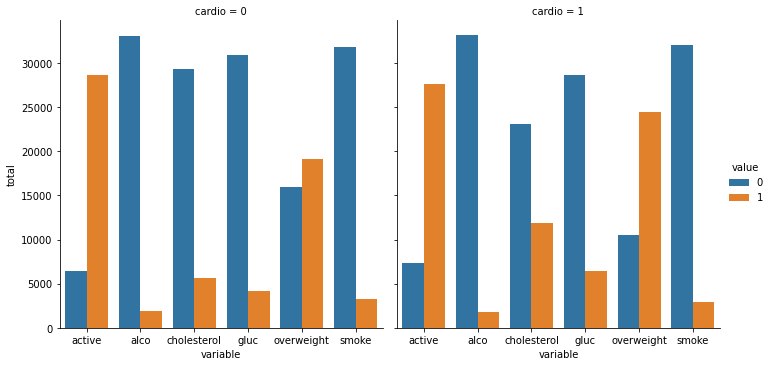

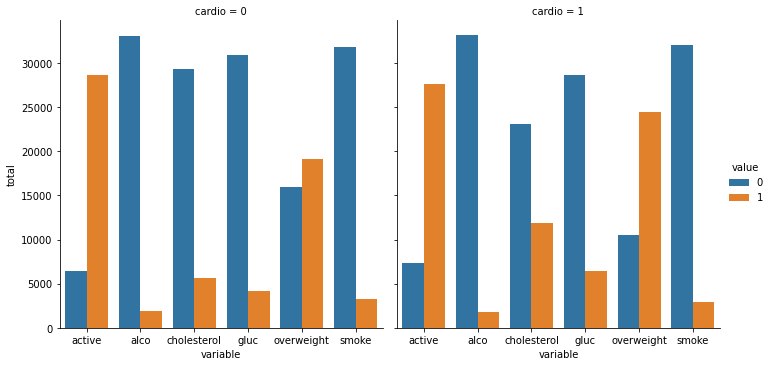

In [9]:
# Draw the catplot with 'sns.catplot()'
import seaborn as sns

sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

fig = (sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')).fig

In [10]:
# Draw Heat Map
# Clean the data
df_heat = df.loc[ (df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) 
& (df["height"] <= df["height"].quantile(0.975) ) & (df["weight"] >= df["weight"].quantile(0.025) ) & (df["weight"] <= df["weight"].quantile(0.975) ) ]

print(df_heat[["ap_lo", "ap_hi"]])

       ap_lo  ap_hi
0         80    110
1         90    140
2         70    130
3        100    150
4         60    100
...      ...    ...
69993     90    130
69994     80    150
69995     80    120
69998     80    135
69999     80    120

[63259 rows x 2 columns]


In [11]:
# Calculate the correlation matrix
corr = df_heat.corr()

In [12]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

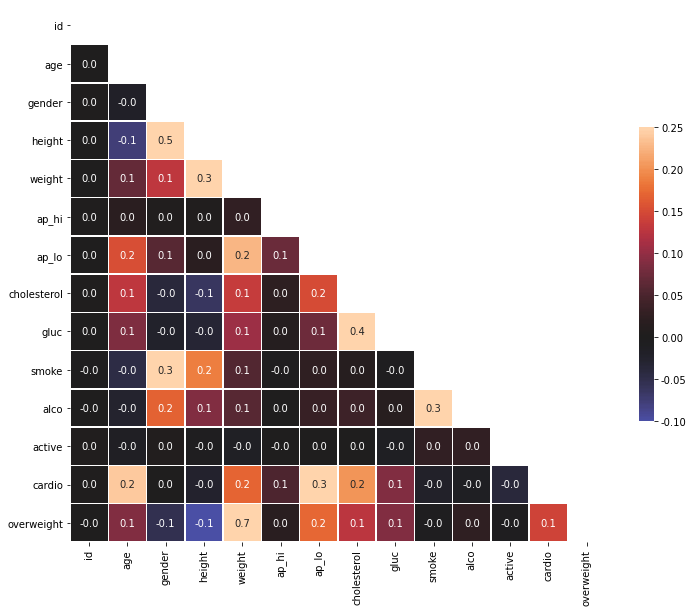

In [13]:
import matplotlib.pyplot as plt

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(
      corr,
      linewidths=.5,
      annot=True,
      fmt='.1f',
      mask=mask,
      square=True,
      center=0,
      vmin=-0.1,
      vmax=0.25,
      cbar_kws={
          'shrink': .45,
          'format': '%.2f'
      })